In [2]:
# EXAMPLE FOR 2 ITERATIONS OF BAYESIAN OPTIMIZATION. THIS WAS REPEATED 6 TIMES
# Please excuse the horrific coding practices when repeating methods to build multiple plots :( 

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

# kernel function
def k(xi, xj, t):
    xi_sq = np.sum(xi**2, 1)
    xj_sq = np.sum(xj**2, 1)
    dist_sq = xi_sq.reshape(len(xi), 1) + xj_sq - 2*np.dot(xi, xj.T)
    return np.exp(-.5 * (1/t**2) * dist_sq)

#prior samples
example_xs = np.linspace(-5, 5, 50).reshape(50,1)
chol = np.linalg.cholesky(k(example_xs, example_xs, 0.5) + 1e-10*np.eye(50))
rand_numbers = np.random.normal(size=(50,3))
prior_samples = np.dot(chol, rand_numbers)

# posterior samples
init_xs = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
init_ys = np.sin(init_xs)
init_cholesky = np.linalg.cholesky(k(init_xs, init_xs, 0.5) + 1e-5*np.eye(len(init_xs)))
new_cov = np.linalg.solve(init_cholesky, k(init_xs, example_xs, 0.5))
init_mean = np.dot(new_cov.T, np.linalg.solve(init_cholesky, init_ys)).reshape((50,))
init_stdv = np.sqrt(np.diag(k(example_xs, example_xs, 0.5)) - np.sum(new_cov**2, axis=0))
init = np.linalg.cholesky(k(example_xs, example_xs, 0.5) + 1e-6*np.eye(50) - np.dot(new_cov.T, new_cov))

# posterior
def post(init_mean, init):
    return init_mean.reshape(50,1) + np.dot(init, np.random.normal(size=(50,1)))


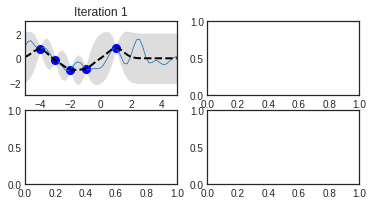

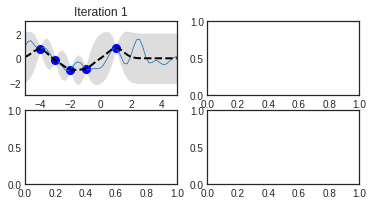

In [9]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = [6,2])
ax1.plot(init_xs, init_ys, 'bo', ms=8, label='Data point')
ax1.plot(example_xs, post(init_mean, init), linewidth=0.8, label='Sample from posterior')
ax1.fill_between(example_xs.flat, init_mean-2*init_stdv, init_mean+2*init_stdv, color="#dddddd")
ax1.plot(example_xs, init_mean, 'b--', color='black', lw=2, label='Posterior mean')
ax1.axis([-5, 5, -3, 3])
f.set_figheight(3)
ax1.set_title('Iteration 1')
f

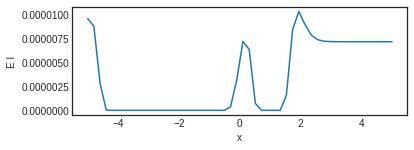

In [18]:
import scipy.optimize, scipy.stats as st

yb0 = np.argmax(init_ys)

def ei(y_best, mu, s2):
    Z = (mu - y_best)/np.sqrt(s2)
    return ((mu-y_best)*st.norm.cdf(Z) + np.sqrt(s2)*st.norm.pdf(Z))

max_val = example_xs[np.argmax(ei(yb0, init_mean, init_stdv**2))]
plt.figure(figsize = [6, 2])
plt.ylabel('E I')
plt.xlabel('x')
plt.plot(example_xs, ei(yb0, init_mean, init_stdv**2))

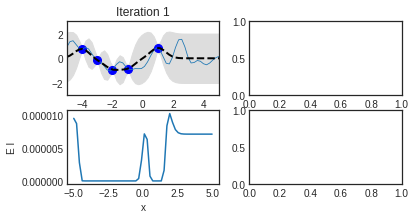

In [21]:
ax3.plot(example_xs, ei(yb0, init_mean, init_stdv**2))
ax3.set_ylabel('E I')
ax3.set_xlabel('x')
f

In [23]:
# Noiseless training data

init_xs = np.array([-4, -3, -2, -1, 1, max_val]).reshape(6,1)
init_ys = np.sin(init_xs)
init_cholesky = np.linalg.cholesky(k(init_xs, init_xs, 0.5) + 1e-5*np.eye(len(init_xs)))
new_cov = np.linalg.solve(init_cholesky, k(init_xs, example_xs, 0.5))
init_mean = np.dot(new_cov.T, np.linalg.solve(init_cholesky, init_ys)).reshape((50,))
init_stdv = np.sqrt(np.diag(k(example_xs, example_xs, 0.5)) - np.sum(new_cov**2, axis=0))
init = np.linalg.cholesky(k(example_xs, example_xs, 0.5) + 1e-6*np.eye(50) - np.dot(new_cov.T, new_cov))

# posterior
def post(init_mean, init):
    return init_mean.reshape(50,1) + np.dot(init, np.random.normal(size=(50,1)))


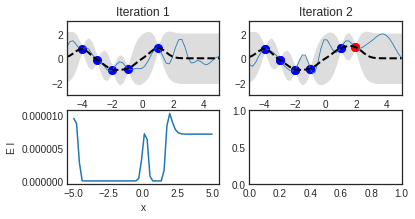

In [26]:
ax2.plot(init_xs[0:-1], init_ys[0:-1], 'bo', ms=8, label='Data point')
ax2.plot(max_val, np.sin(max_val), 'ro', ms=8, label='New Data point')
ax2.plot(example_xs, post(init_mean, init), linewidth=0.8, label='Sample from posterior')
ax2.fill_between(example_xs.flat, init_mean-2*init_stdv, init_mean+2*init_stdv, color="#dddddd")
ax2.plot(example_xs, init_mean, 'b--', color='black', lw=2, label='Posterior mean')
ax2.axis([-5, 5, -3, 3])
ax2.set_title('Iteration 2')
f.set_figheight(3)
f

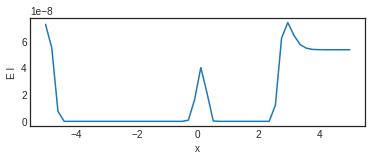

In [29]:
yb1 = np.argmax(init_ys)

def ei(y_best, mu, s2):
    Z = (mu - y_best)/np.sqrt(s2)
    return ((mu-y_best)*st.norm.cdf(Z) + np.sqrt(s2)*st.norm.pdf(Z))

max_val = example_xs[np.argmax(ei(yb1, init_mean, init_stdv**2))]
plt.figure(figsize = [6, 2])
plt.ylabel('E I')
plt.xlabel('x')
plt.plot(example_xs, ei(yb0, init_mean, init_stdv**2))

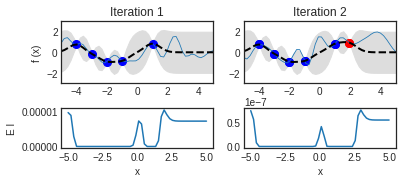

In [31]:
ax4.plot(example_xs, ei(yb0, init_mean, init_stdv**2))
ax4.set_xlabel('x')
ax1.set_ylabel('f (x)')
box = ax4.get_position()
ax4.set_position([box.x0, box.y0+0.05, box.width, box.height*0.65])
box1 = ax3.get_position()
ax3.set_position([box1.x0, box1.y0+0.05, box1.width, box1.height*0.65])
f.set_figheight(2.5)
f.savefig('BOpt1.svg')
f